In [1]:
%matplotlib inline
import xmitgcm
import xgcm
import xarray as xr
from xlayers import finegrid, layers
from xlayers.core import layers_apply
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
matplotlib.rcParams.update({'font.size': 14})

In [2]:
datadir='tracers_mod_LGM/diffusion_50'
iters=range(54150000,54300000,150000)
prefixes=['dyn','layersDiags','tracer1','tracer2']
ds50=xmitgcm.open_mdsdataset(datadir,prefix=prefixes,iters=iters)
grid = xgcm.Grid(ds50, periodic=['X'])

In [3]:
datadir='tracers_mod_LGM/diffusion_500'
iters=range(54150000,54300000,150000)
prefixes=['tracer1','tracer2']
ds500=xmitgcm.open_mdsdataset(datadir,prefix=prefixes,iters=iters)

In [4]:
datadir='tracers_mod_LGM/diffusion_5000'
iters=range(54150000,54300000,150000)
prefixes=['tracer1','tracer2']
ds5000=xmitgcm.open_mdsdataset(datadir,prefix=prefixes,iters=iters)

In [5]:
datadir='tracers_mod_LGM/LGM50'
iters=range(64800000,64850000,150000)
prefixes=['dyn','layersDiags','tracer1','tracer2']
dsLGM50=xmitgcm.open_mdsdataset(datadir,prefix=prefixes,iters=iters)
gridLGM = xgcm.Grid(dsLGM50, periodic=['X'])

In [6]:
datadir='tracers_mod_LGM/LGM500'
iters=range(64800000,64850000,150000)
prefixes=['tracer1','tracer2']
dsLGM500=xmitgcm.open_mdsdataset(datadir,prefix=prefixes,iters=iters)


In [7]:
datadir='tracers_mod_LGM/LGM5000'
iters=range(64800000,64850000,150000)
prefixes=['tracer1','tracer2']
dsLGM5000=xmitgcm.open_mdsdataset(datadir,prefix=prefixes,iters=iters)

In [8]:
La = ds50.dxC[:,141:].sum('XG').values
Lp = ds50.dxC[:,0:140].sum('XG').values

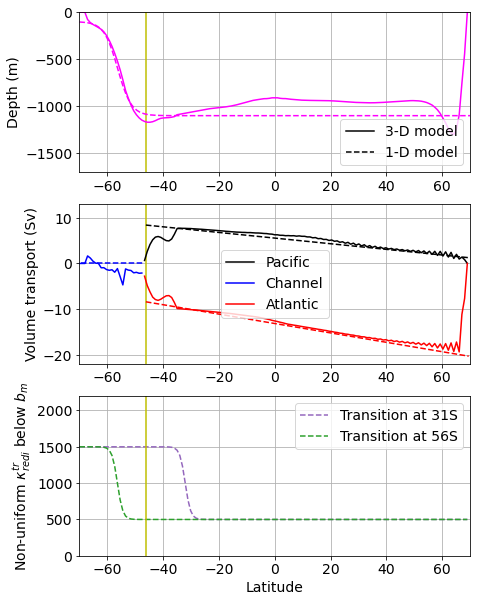

In [9]:
fig = plt.figure(figsize=(7,10))
plt.subplot(3, 1, 1)
ax=plt.gca()
ax.axvline(ds50.YC[24],c='y')
a1=(-ds50.LaHs1RHO[:,0:21,:,140:]).sum('layer_1RHO_center').mean('time').mean('XC').plot(color='magenta',label='depth of $b_m$ (modern)')
modelh=-1000*(np.tanh((np.arange(0,144)-14)/5)+1)/2-100
modelhLGM=-800*(np.tanh((np.arange(0,144)-14)/5)+1)/2-100
plt.plot(np.linspace(-70,70,144),modelh,color='magenta',linestyle='dashed')
plt.ylabel('Depth (m)')
faux1=plt.plot([-100, -99],[0,10],'k-',label='3-D model')
faux2=plt.plot([-100, -99],[0,10],'k--',label='1-D model')
plt.legend(handles=[faux1[0],faux2[0]], loc='lower right')
plt.xlabel('')
plt.grid(True)
plt.ylim(-1700,0.5)
plt.xlim(-70,70)
ax=plt.gca()
#ax.add_artist(leg1)

plt.subplot(3, 1, 2)
ax=plt.gca()
ax.axvline(ds50.YC[24],c='y')
a1=((ds50.LaVH1RHO[:,21:,24:,0:140].sum('layer_1RHO_center').mean('time')*ds50.dxG[24:,0:140]).sum('XC')/10**6).plot(color='k',label='Pacific')
a2=((ds50.LaVH1RHO[:,21:,:24,:].sum('layer_1RHO_center').mean('time')*ds50.dxG[:24,:]).sum('XC')/10**6).plot(color='b',label='Channel')
a3=((ds50.LaVH1RHO[:,21:,24:,140:].sum('layer_1RHO_center').mean('time')*ds50.dxG[24:,140:]).sum('XC')/10**6).plot(color='r',label='Atlantic')
plt.grid(True)
vatl=-6*np.ones(144)*10**6-np.arange(0,144)*10**5
vpac=9.84*np.ones(144)*10**6-np.arange(0,144)*6*10**4
vatl[0:24]=(vatl[24]+vpac[24])*np.arange(0,24)/24

plt.plot(ds50.YC[24:],vpac[24:]/10**6,'k--')
plt.plot(ds50.YC[:24],vatl[:24]/10**6,'b--')
plt.plot(ds50.YC[24:],vatl[24:]/10**6,'r--')
plt.ylim(-22,13)
plt.xlim(-70,70)
plt.xlabel('')

plt.ylabel('Volume transport (Sv)')
plt.legend(handles=[a1[0],a2[0],a3[0]], loc='center')


plt.subplot(3, 1, 3)



modelkappa=-1000*(np.tanh((np.arange(0,144)-39)/2)+1)/2+1500
plt.plot(ds50.YG.values,modelkappa,color='tab:purple',linestyle='dashed')

modelkappa=-1000*(np.tanh((np.arange(0,144)-14)/2)+1)/2+1500
plt.plot(ds50.YG.values,modelkappa,color='tab:green',linestyle='dashed')

plt.legend(('Transition at 31S', 'Transition at 56S'))
ax=plt.gca()
ax.axvline(ds50.YC[24],c='y')
plt.xlim(-70,70)
plt.ylim(0,2200)
plt.ylabel('Non-uniform $\kappa_{redi}^{tr}$ below $b_m$')
plt.xlabel('Latitude')
ax=plt.gca()
plt.grid(True)
#ax.add_artist(leg1)
fig=plt.gcf()
fig.savefig('h_depth.pdf', bbox_inches='tight')

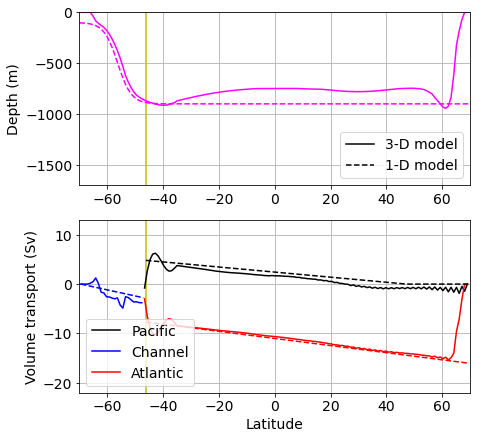

In [10]:
fig = plt.figure(figsize=(7,7))
plt.subplot(2, 1, 1)
ax=plt.gca()
ax.axvline(ds50.YC[24],c='y')
a2=(-dsLGM50.LaHs1RHO[:,0:18,:,140:]).sum('layer_1RHO_center').mean('time').mean('XC').plot(color='magenta',label='depth of $b_m$ (LGM)')
modelhLGM=-800*(np.tanh((np.arange(0,144)-14)/5)+1)/2-100
plt.plot(np.linspace(-70,70,144),modelhLGM,color='magenta',linestyle='dashed')
plt.ylabel('Depth (m)')
faux1=plt.plot([-100, -99],[0,10],'k-',label='3-D model')
faux2=plt.plot([-100, -99],[0,10],'k--',label='1-D model')
plt.legend(handles=[faux1[0],faux2[0]], loc='lower right')
plt.xlabel('')
plt.grid(True)
plt.ylim(-1700,0.5)
plt.xlim(-70,70)

plt.subplot(2, 1, 2)
ax=plt.gca()
ax.axvline(ds50.YC[24],c='y')
a1=((dsLGM50.LaVH1RHO[:,18:,24:,0:140].sum('layer_1RHO_center').mean('time')*dsLGM50.dxG[24:,0:140]).sum('XC')/10**6).plot(color='k',label='Pacific')
a2=((dsLGM50.LaVH1RHO[:,18:,:24,:].sum('layer_1RHO_center').mean('time')*dsLGM50.dxG[:24,:]).sum('XC')/10**6).plot(color='b',label='Channel')
a3=((dsLGM50.LaVH1RHO[:,18:,24:,140:].sum('layer_1RHO_center').mean('time')*dsLGM50.dxG[24:,140:]).sum('XC')/10**6).plot(color='r',label='Atlantic')
plt.grid(True)
vatlLGM=-6*np.ones(144)*10**6-np.arange(0,144)*7*10**4
vpacLGM=6*np.ones(144)*10**6-np.arange(0,144)*5*10**4
vpacLGM[vpacLGM<0]=0
vatlLGM[0:24]=(vatlLGM[24]+vpacLGM[24])*np.arange(0,24)/24

plt.plot(ds50.YC[24:],vpacLGM[24:]/10**6,'k--')
plt.plot(ds50.YC[:24],vatlLGM[:24]/10**6,'b--')
plt.plot(ds50.YC[24:],vatlLGM[24:]/10**6,'r--')
plt.ylim(-22,13)
plt.xlim(-70,70)
plt.xlabel('Latitude')
plt.ylabel('Volume transport (Sv)')

plt.legend(handles=[a1[0],a2[0],a3[0]], loc='lower left')

fig=plt.gcf()
fig.savefig('h_depth_LGM1.pdf', bbox_inches='tight')

In [11]:
#modern
buoy=9.81*(2*10**-4*ds50.THETA-7.4*10**-4*(ds50.SALT-35))
baxis=np.arange(0.002,0.06,0.0002)
tracer_50 = layers_apply(ds50.TRAC01.mean('time'), buoy.mean('time'), baxis, ds50.drF, ds50.drC, 10, 'Z', 'Tlev')
zeta_50 = layers_apply(xr.ones_like(ds50.TRAC01.mean('time')), buoy.mean('time'), baxis, ds50.drF, ds50.drC, 10, 'Z', 'Tlev')

tracer_500 = layers_apply(ds500.TRAC01.mean('time'), buoy.mean('time'), baxis, ds500.drF, ds500.drC, 10, 'Z', 'Tlev')
zeta_500 = zeta_50

tracer_5000 = layers_apply(ds5000.TRAC01.mean('time'), buoy.mean('time'), baxis, ds5000.drF, ds5000.drC, 10, 'Z', 'Tlev')
zeta_5000 = zeta_50


In [12]:
#modern AABW
AABW=(ds50.TRAC09+ds50.TRAC10).load()
buoy=9.81*(2*10**-4*ds50.THETA-7.4*10**-4*(ds50.SALT-35))
baxis=np.arange(0.002,0.06,0.0002)
tracer_50AABW = layers_apply(AABW.mean('time'), buoy.mean('time'), baxis, ds50.drF, ds50.drC, 10, 'Z', 'Tlev')
zeta_50AABW = layers_apply(xr.ones_like(AABW.mean('time')), buoy.mean('time'), baxis, ds50.drF, ds50.drC, 10, 'Z', 'Tlev')

AABW=(ds500.TRAC09+ds500.TRAC10).load()
tracer_500AABW = layers_apply(AABW.mean('time'), buoy.mean('time'), baxis, ds500.drF, ds500.drC, 10, 'Z', 'Tlev')
zeta_500AABW = zeta_50AABW

AABW=(ds5000.TRAC09+ds5000.TRAC10).load()
tracer_5000AABW = layers_apply(AABW.mean('time'), buoy.mean('time'), baxis, ds5000.drF, ds5000.drC, 10, 'Z', 'Tlev')
zeta_5000AABW = zeta_50AABW


In [13]:
#LGM
buoyLGM=9.81*(2*10**-4*dsLGM50.THETA-7.4*10**-4*(dsLGM50.SALT-35))
baxis=np.arange(0.002,0.06,0.0002)
tracer_LGM50 = layers_apply(dsLGM50.TRAC01.mean('time'), buoyLGM.mean('time'), baxis, ds50.drF, ds50.drC, 10, 'Z', 'Tlev')
zeta_LGM50 = layers_apply(xr.ones_like(dsLGM50.TRAC01.mean('time')), buoyLGM.mean('time'), baxis, ds50.drF, ds50.drC, 10, 'Z', 'Tlev')

tracer_LGM500 = layers_apply(dsLGM500.TRAC01.mean('time'), buoyLGM.mean('time'), baxis, ds50.drF, ds50.drC, 10, 'Z', 'Tlev')
zeta_LGM500 = zeta_LGM50

tracer_LGM5000 = layers_apply(dsLGM5000.TRAC01.mean('time'), buoyLGM.mean('time'), baxis, ds50.drF, ds50.drC, 10, 'Z', 'Tlev')
zeta_LGM5000 = zeta_LGM50


In [14]:
#modern
import redi_analytical as ra

modelh=(4000-1000*(np.tanh((np.arange(0,144)-14)/5)+1)/2-100)
modelkappa=50*np.ones(144)
ntime=540000
chanloc=24
La[0:chanloc]=ds50.dxC[0:chanloc,:].sum('XG').values
vatl_in=vatl
vpac_in=vpac
vpac_in[vpac_in<0]=0
vatl_in[0:chanloc]=vatl[0:chanloc]
C50,Cpac50,iso_diff_atl50,mer_adv_atl50,iso_diff_pac50,mer_adv_pac50=ra.redi_analytical(ds50,modelkappa,chanloc,vatl_in,vpac_in,La,Lp,modelh,ntime,2*10**-8)
modelkappa=500*np.ones(144)
ntime=540000
chanloc=24
vatl_in=vatl
vpac_in=vpac
vpac_in[vpac_in<0]=0
vatl_in[0:chanloc]=vatl[0:chanloc]
C500,Cpac500,iso_diff_atl500,mer_adv_atl500,iso_diff_pac500,mer_adv_pac500=ra.redi_analytical(ds50,modelkappa,chanloc,vatl_in,vpac_in,La,Lp,modelh,ntime,10**-8)
modelkappa=5000*np.ones(144)
ntime=540000
chanloc=24
vatl_in=vatl
vpac_in=vpac
vpac_in[vpac_in<0]=0
vatl_in[0:chanloc]=vatl[0:chanloc]
C5000,Cpac5000,iso_diff_atl5000,mer_adv_atl5000,iso_diff_pac5000,mer_adv_pac5000=ra.redi_analytical(ds50,modelkappa,chanloc,vatl_in,vpac_in,La,Lp,modelh,ntime,10**-9)

In [15]:
#modern vert
import redi_analytical as ra
La[0:chanloc]=ds50.dxC[0:chanloc,:].sum('XG').values
modelh=(4000-1000*(np.tanh((np.arange(0,144)-14)/5)+1)/2-100)
modelkappa=-1000*(np.tanh((np.arange(0,144)-39)/2)+1)/2+1500
ntime=540000
chanloc=24
vatl_in=vatl
vpac_in=vpac
vpac_in[vpac_in<0]=0
vatl_in[0:chanloc]=vatl[0:chanloc]
Cn,Cpacn,iso_diff_atln,mer_adv_atln,iso_diff_pacn,mer_adv_pacn=ra.redi_analytical(ds50,modelkappa,chanloc,vatl_in,vpac_in,La,Lp,modelh,ntime,10**-9)

modelh=(4000-1000*(np.tanh((np.arange(0,144)-14)/5)+1)/2-100)
#modelkappa=-2450*(np.tanh((np.arange(0,144)-19)/5)+1)/2+2500
modelkappa=-1000*(np.tanh((np.arange(0,144)-14)/2)+1)/2+1500
ntime=540000
chanloc=24
vatl_in=vatl
vpac_in=vpac
vpac_in[vpac_in<0]=0
vatl_in[0:chanloc]=vatl[0:chanloc]
Cf,Cpacf,iso_diff_atlf,mer_adv_atlf,iso_diff_pacf,mer_adv_pacf=ra.redi_analytical(ds50,modelkappa,chanloc,vatl_in,vpac_in,La,Lp,modelh,ntime,10**-8)

In [16]:
#modern AABW
import redi_analytical as ra
La[0:chanloc]=ds50.dxC[0:chanloc,:].sum('XG').values
modelh=(4000-1000*(np.tanh((np.arange(0,144)-14)/5)+1)/2-100)
modelkappa=50*np.ones(144)
ntime=540000
chanloc=24
vatl_in=vatl
vpac_in=vpac
vpac_in[vpac_in<0]=0
vatl_in[0:chanloc]=vatl[0:chanloc]
C50AABW,Cpac50AABW=ra.redi_analytical_AABW(ds50,modelkappa,chanloc,vatl_in,vpac_in,La,Lp,modelh,ntime,2*10**-8)
modelkappa=500*np.ones(144)
ntime=540000
chanloc=24
vatl_in=vatl
vpac_in=vpac
vpac_in[vpac_in<0]=0
vatl_in[0:chanloc]=vatl[0:chanloc]
C500AABW,Cpac500AABW=ra.redi_analytical_AABW(ds50,modelkappa,chanloc,vatl_in,vpac_in,La,Lp,modelh,ntime,10**-8)
modelkappa=5000*np.ones(144)
ntime=540000
chanloc=24
vatl_in=vatl
vpac_in=vpac
vpac_in[vpac_in<0]=0
vatl_in[0:chanloc]=vatl[0:chanloc]
C5000AABW,Cpac5000AABW=ra.redi_analytical_AABW(ds50,modelkappa,chanloc,vatl_in,vpac_in,La,Lp,modelh,ntime,10**-9)


In [17]:
#LGM
import redi_analytical as ra
La[0:chanloc]=ds50.dxC[0:chanloc,:].sum('XG').values
modelh=(4000-800*(np.tanh((np.arange(0,144)-14)/5)+1)/2-100)
modelkappa=50*np.ones(144)
ntime=4*540000
chanloc=24
vatl_in=vatlLGM
vpac_in=vpacLGM
vpac_in[vpac_in<0]=0
vatl_in[0:chanloc]=vatlLGM[0:chanloc]
CLGM50,CpacLGM50,iso_diff_atlLGM50,mer_adv_atlLGM50,iso_diff_pacLGM50,mer_adv_pacLGM50=ra.redi_analytical(dsLGM50,modelkappa,chanloc,vatl_in,vpac_in,La,Lp,modelh,ntime,2*10**-8)
modelkappa=500*np.ones(144)
ntime=540000
chanloc=24
vatl_in=vatlLGM
vpac_in=vpacLGM
vpac_in[vpac_in<0]=0
vatl_in[0:chanloc]=vatlLGM[0:chanloc]
CLGM500,CpacLGM500,iso_diff_atlLGM500,mer_adv_atlLGM500,iso_diff_pacLGM500,mer_adv_pacLGM500=ra.redi_analytical(dsLGM50,modelkappa,chanloc,vatl_in,vpac_in,La,Lp,modelh,ntime,10**-8)
modelkappa=5000*np.ones(144)
ntime=540000
chanloc=24
vatl_in=vatlLGM
vpac_in=vpacLGM
vpac_in[vpac_in<0]=0
vatl_in[0:chanloc]=vatlLGM[0:chanloc]
CLGM5000,CpacLGM5000,iso_diff_atlLGM5000,mer_adv_atlLGM5000,iso_diff_pacLGM5000,mer_adv_pacLGM5000=ra.redi_analytical(dsLGM50,modelkappa,chanloc,vatl_in,vpac_in,La,Lp,modelh,ntime,10**-9)


/home/spencerj/.conda/envs/pangeo1/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


/home/spencerj/.conda/envs/pangeo1/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


/home/spencerj/.conda/envs/pangeo1/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


/home/spencerj/.conda/envs/pangeo1/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/spencerj/.conda/envs/pangeo1/lib/python3.7/site-packages/ipykernel/__main__.py:37: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f990455b910> has a label of '_line1' which cannot be automatically added to the legend.
/home/spencerj/.conda/envs/pangeo1/lib/python3.7/site-packages/ipykernel/__main__.py:37: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f9904579990> has a label of '_line2' which cannot be automatically added to the legend.
/home/spencerj/.conda/envs/pangeo1/lib/python3.7/site-packages/ipykernel/__main__.py:37: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f9880780e90> has a label of '_line3' which cannot be automatically added to the legend.


/home/spencerj/.conda/envs/pangeo1/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


/home/spencerj/.conda/envs/pangeo1/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


/home/spencerj/.conda/envs/pangeo1/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


/home/spencerj/.conda/envs/pangeo1/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


/home/spencerj/.conda/envs/pangeo1/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


/home/spencerj/.conda/envs/pangeo1/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


/home/spencerj/.conda/envs/pangeo1/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


/home/spencerj/.conda/envs/pangeo1/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


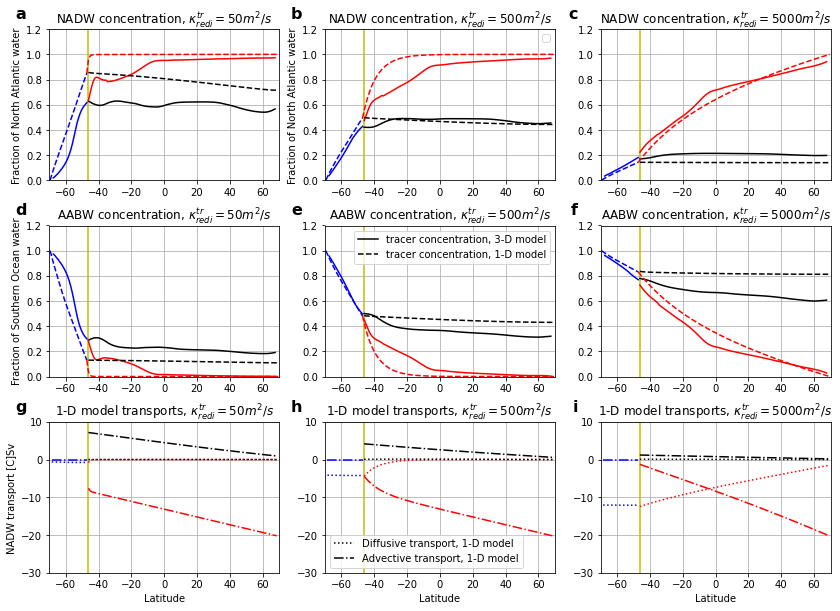

In [18]:
#for modern AABW+NADW
matplotlib.rcParams.update({'font.size': 10})
plt.figure(figsize=(14,10))
plt.subplot(3,3,1)
bm=32
modelh=(4000-1000*(np.tanh((np.arange(0,144)-14)/5)+1)/2-100)
ax=plt.gca()
ax.axvline(ds50.YC[chanloc],c='y')
a1=((((tracer_50[24:-2,0:140,0:bm].sum('Tlev')/zeta_50[24:-2,0:140,0:bm].sum('Tlev'))*ds50.rA[24:,0:140]).sum('XC'))/(ds50.rA[24:,0:140].sum('XC'))).plot(color='k')
a2=((((tracer_50[2:24,:,0:bm].sum('Tlev')/zeta_50[2:24,:,0:bm].sum('Tlev'))*ds50.rA[2:24,:]).sum('XC'))/(ds50.rA[2:24,:].sum('XC'))).plot(color='b')
a3=((((tracer_50[24:-2,140:,0:bm].sum('Tlev')/zeta_50[24:-2,140:,0:bm].sum('Tlev'))*ds50.rA[24:-2,140:]).sum('XC'))/(ds50.rA[24:-2,140:].sum('XC'))).plot(color='r')
plt.grid(True)

a5=plt.plot(ds50.YC[chanloc:],Cpac50[chanloc:,-1]/modelh[-1],'k--')
a4=plt.plot(ds50.YC[:24],C50[:24,-1]/modelh[:24],'b--')
a4=plt.plot(ds50.YC[23:],C50[23:,-1]/modelh[23:],'r--')
#plt.legend(('Pacific', 'channel','Atlantic'),loc='upper right')
plt.ylabel('Fraction of North Atlantic water')
plt.xlabel('')
plt.ylim(0,1.2)
plt.xlim(-70,70)
plt.title('NADW concentration, $\kappa_{redi}^{tr}=50m^2/s$')

ax.text(-0.1, 1.15, 'a', transform=ax.transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')

plt.subplot(3,3,2)
ax=plt.gca()
ax.axvline(ds50.YC[chanloc],c='y')
a1=((((tracer_500[24:-2,0:140,0:bm].sum('Tlev')/zeta_500[24:-2,0:140,0:bm].sum('Tlev'))*ds50.rA[24:,0:140]).sum('XC'))/(ds50.rA[24:,0:140].sum('XC'))).plot(color='k')
a2=((((tracer_500[2:24,:,0:bm].sum('Tlev')/zeta_500[2:24,:,0:bm].sum('Tlev'))*ds50.rA[2:24,:]).sum('XC'))/(ds50.rA[2:24,:].sum('XC'))).plot(color='b')
a3=((((tracer_500[24:-2,140:,0:bm].sum('Tlev')/zeta_500[24:-2,140:,0:bm].sum('Tlev'))*ds50.rA[24:-2,140:]).sum('XC'))/(ds50.rA[24:-2,140:].sum('XC'))).plot(color='r')
plt.grid(True)
a5=plt.plot(ds50.YC[chanloc:],Cpac500[chanloc:,-1]/modelh[-1],'k--')
a4=plt.plot(ds50.YC[:24],C500[:24,-1]/modelh[:24],'b--')
a4=plt.plot(ds50.YC[23:],C500[23:,-1]/modelh[23:],'r--')
plt.legend(handles=[a1[0],a2[0],a3[0]],loc='best')
plt.ylabel('Fraction of North Atlantic water')
plt.ylim(0,1.2)
plt.xlim(-70,70)
plt.xlabel('')
plt.title('NADW concentration, $\kappa_{redi}^{tr}=500m^2/s$')
ax=plt.gca()
ax.text(-0.1, 1.15, 'b', transform=ax.transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')

plt.subplot(3,3,3)
ax=plt.gca()
ax.axvline(ds50.YC[chanloc],c='y')
a1=((((tracer_5000[24:-2,0:140,0:bm].sum('Tlev')/zeta_5000[24:-2,0:140,0:bm].sum('Tlev'))*ds50.rA[24:,0:140]).sum('XC'))/(ds50.rA[24:,0:140].sum('XC'))).plot(color='k')
a2=((((tracer_5000[2:24,:,0:bm].sum('Tlev')/zeta_5000[2:24,:,0:bm].sum('Tlev'))*ds50.rA[2:24,:]).sum('XC'))/(ds50.rA[2:24,:].sum('XC'))).plot(color='b')
a3=((((tracer_5000[24:-2,140:,0:bm].sum('Tlev')/zeta_5000[24:-2,140:,0:bm].sum('Tlev'))*ds50.rA[24:-2,140:]).sum('XC'))/(ds50.rA[24:-2,140:].sum('XC'))).plot(color='r')
plt.grid(True)
a5=plt.plot(ds50.YC[chanloc:],Cpac5000[chanloc:,-1]/modelh[23:-1],'k--')
a4=plt.plot(ds50.YC[:24],C5000[:24,-1]/modelh[:24],'b--')
a4=plt.plot(ds50.YC[23:],C5000[23:,-1]/modelh[23:],'r--')
#plt.legend(('Pacific', 'channel','Atlantic'),loc='upper right')
#plt.ylabel('Fraction of North Atlantic water')
plt.ylim(0,1.2)
plt.xlim(-70,70)
plt.xlabel('')
plt.title('NADW concentration, $\kappa_{redi}^{tr}=5000m^2/s$')
ax=plt.gca()
ax.text(-0.1, 1.15, 'c', transform=ax.transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')

plt.subplot(3,3,4)
ax=plt.gca()
ax.axvline(ds50.YC[chanloc],c='y')
bm=32
modelh=(4000-1000*(np.tanh((np.arange(0,144)-14)/5)+1)/2-100)
a1=((((tracer_50AABW[24:-2,0:140,0:bm].sum('Tlev')/zeta_50AABW[24:-2,0:140,0:bm].sum('Tlev'))*ds50.rA[24:,0:140]).sum('XC'))/(ds50.rA[24:,0:140].sum('XC'))).plot(color='k')
a2=((((tracer_50AABW[2:24,:,0:bm].sum('Tlev')/zeta_50AABW[2:24,:,0:bm].sum('Tlev'))*ds50.rA[2:24,:]).sum('XC'))/(ds50.rA[2:24,:].sum('XC'))).plot(color='b')
a3=((((tracer_50AABW[24:-2,140:,0:bm].sum('Tlev')/zeta_50AABW[24:-2,140:,0:bm].sum('Tlev'))*ds50.rA[24:-2,140:]).sum('XC'))/(ds50.rA[24:-2,140:].sum('XC'))).plot(color='r')
plt.grid(True)

a5=plt.plot(ds50.YC[chanloc:],Cpac50AABW[chanloc:,-1]/modelh[-1],'k--')
a4=plt.plot(ds50.YC[:24],C50AABW[:24,-1]/modelh[:24],'b--')
a4=plt.plot(ds50.YC[23:],C50AABW[23:,-1]/modelh[23:],'r--')
#plt.legend(('Pacific', 'channel','Atlantic'),loc='upper right')
plt.ylabel('Fraction of Southern Ocean water')
plt.ylim(0,1.2)
plt.xlim(-70,70)
plt.xlabel('')
plt.title('AABW concentration, $\kappa_{redi}^{tr}=50m^2/s$')
ax=plt.gca()
ax.text(-0.1, 1.15, 'd', transform=ax.transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')


plt.subplot(3,3,5)
ax=plt.gca()
ax.axvline(ds50.YC[chanloc],c='y')
a1=((((tracer_500AABW[24:-2,0:140,0:bm].sum('Tlev')/zeta_500AABW[24:-2,0:140,0:bm].sum('Tlev'))*ds50.rA[24:,0:140]).sum('XC'))/(ds50.rA[24:,0:140].sum('XC'))).plot(color='k')
a2=((((tracer_500AABW[2:24,:,0:bm].sum('Tlev')/zeta_500AABW[2:24,:,0:bm].sum('Tlev'))*ds50.rA[2:24,:]).sum('XC'))/(ds50.rA[2:24,:].sum('XC'))).plot(color='b')
a3=((((tracer_500AABW[24:-2,140:,0:bm].sum('Tlev')/zeta_500AABW[24:-2,140:,0:bm].sum('Tlev'))*ds50.rA[24:-2,140:]).sum('XC'))/(ds50.rA[24:-2,140:].sum('XC'))).plot(color='r')
plt.grid(True)
a5=plt.plot(ds50.YC[chanloc:],Cpac500AABW[chanloc:,-1]/modelh[-1],'k--')
a4=plt.plot(ds50.YC[:chanloc],C500AABW[:chanloc,-1]/modelh[:chanloc],'b--')
a4=plt.plot(ds50.YC[chanloc-1:],C500AABW[chanloc-1:,-1]/modelh[chanloc-1:],'r--')
#plt.legend(('Pacific', 'channel','Atlantic'),loc='upper right')
#plt.ylabel('Fraction of Southern Ocean water')

faux1=plt.plot([-100, -99],[0,10],'k-',label='tracer concentration, 3-D model')
faux2=plt.plot([-100, -99],[0,10],'k--',label='tracer concentration, 1-D model')
plt.legend(handles=[faux1[0],faux2[0]], loc='upper right')

plt.ylim(0,1.2)
plt.xlim(-70,70)
plt.xlabel('')
plt.title('AABW concentration, $\kappa_{redi}^{tr}=500m^2/s$')
ax=plt.gca()
ax.text(-0.1, 1.15, 'e', transform=ax.transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')


plt.subplot(3,3,6)
ax=plt.gca()
ax.axvline(ds50.YC[chanloc],c='y')
a1=((((tracer_5000AABW[24:-2,0:140,0:bm].sum('Tlev')/zeta_5000AABW[24:-2,0:140,0:bm].sum('Tlev'))*ds50.rA[24:,0:140]).sum('XC'))/(ds50.rA[24:,0:140].sum('XC'))).plot(color='k')
a2=((((tracer_5000AABW[2:24,:,0:bm].sum('Tlev')/zeta_5000AABW[2:24,:,0:bm].sum('Tlev'))*ds50.rA[2:24,:]).sum('XC'))/(ds50.rA[2:24,:].sum('XC'))).plot(color='b')
a3=((((tracer_5000AABW[24:-2,140:,0:bm].sum('Tlev')/zeta_5000AABW[24:-2,140:,0:bm].sum('Tlev'))*ds50.rA[24:-2,140:]).sum('XC'))/(ds50.rA[24:-2,140:].sum('XC'))).plot(color='r')
plt.grid(True)

a5=plt.plot(ds50.YC[chanloc:],Cpac5000AABW[chanloc:,-1]/modelh[-1],'k--')
a4=plt.plot(ds50.YC[:chanloc],C5000AABW[:chanloc,-1]/modelh[:chanloc],'b--')
a4=plt.plot(ds50.YC[chanloc-1:],C5000AABW[chanloc-1:,-1]/modelh[chanloc-1:],'r--')
plt.ylim(0,1.2)
plt.xlim(-70,70)
plt.xlabel('')
plt.title('AABW concentration, $\kappa_{redi}^{tr}=5000m^2/s$')
ax=plt.gca()
ax.text(-0.1, 1.15, 'f', transform=ax.transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')

plt.subplot(3,3,7)
ax=plt.gca()
ax.axvline(ds50.YC[chanloc],c='y')
modelh=(4000-1000*(np.tanh((np.arange(0,144)-14)/5)+1)/2-100)
plt.plot(ds50.YC[chanloc:-1],iso_diff_atl50[chanloc-1:]/10**6,'r:')
plt.plot(ds50.YC[chanloc:-1],mer_adv_atl50[chanloc-1:]/10**6,'r-.')
plt.plot(ds50.YC[1:chanloc],iso_diff_atl50[0:chanloc-1]/10**6,'b:')
plt.plot(ds50.YC[1:chanloc],mer_adv_atl50[0:chanloc-1]/10**6,'b-.')
plt.plot(ds50.YC[chanloc:-1],iso_diff_pac50[chanloc-1:]/10**6,'k:')
plt.plot(ds50.YC[chanloc:-1],mer_adv_pac50[chanloc-1:]/10**6,'k-.')
plt.ylim(-30,10)
plt.xlim(-70,70)
plt.grid(True)
plt.ylabel('NADW transport [C]Sv')
plt.xlabel('Latitude')
#plt.legend(('Diffusion, Atl', 'Advection, Atl','Diffusion, Chan', 'Advection, Chan','Diffusion, Pac',
#            'Advection, Pac'),loc='lower left')
plt.title('1-D model transports, $\kappa_{redi}^{tr}=50m^2/s$')
ax=plt.gca()
ax.text(-0.1, 1.15, 'g', transform=ax.transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')

plt.subplot(3,3,8)
ax=plt.gca()
ax.axvline(ds50.YC[chanloc],c='y')
modelh=(4000-1000*(np.tanh((np.arange(0,144)-14)/5)+1)/2-100)
plt.plot(ds50.YC[chanloc:-1],iso_diff_atl500[chanloc-1:]/10**6,'r:')
plt.plot(ds50.YC[chanloc:-1],mer_adv_atl500[chanloc-1:]/10**6,'r-.')
plt.plot(ds50.YC[1:chanloc],iso_diff_atl500[0:chanloc-1]/10**6,'b:')
plt.plot(ds50.YC[1:chanloc],mer_adv_atl500[0:chanloc-1]/10**6,'b-.')
plt.plot(ds50.YC[chanloc:-1],iso_diff_pac500[chanloc-1:]/10**6,'k:')
plt.plot(ds50.YC[chanloc:-1],mer_adv_pac500[chanloc-1:]/10**6,'k-.')
plt.ylim(-30,10)
plt.xlim(-70,70)
plt.grid(True)
#plt.ylabel('Transport [C]Sv')
plt.xlabel('Latitude')
faux3=plt.plot([-100, -99],[0,10],'k:',label='Diffusive transport, 1-D model')
faux4=plt.plot([-100, -99],[0,10],'k-.',label='Advective transport, 1-D model')
plt.legend(handles=[faux3[0],faux4[0]], loc='lower left')
#plt.legend(('Diffusion, Atl', 'Advection, Atl','Diffusion, Chan', 'Advection, Chan','Diffusion, Pac',
#            'Advection, Pac'),loc='lower left')
plt.title('1-D model transports, $\kappa_{redi}^{tr}=500m^2/s$')
ax=plt.gca()
ax.text(-0.1, 1.15, 'h', transform=ax.transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')


plt.subplot(3,3,9)
ax=plt.gca()
ax.axvline(ds50.YC[chanloc],c='y')
modelh=(4000-1000*(np.tanh((np.arange(0,144)-14)/5)+1)/2-100)
plt.plot(ds50.YC[chanloc:-1],iso_diff_atl5000[chanloc-1:]/10**6,'r:')
plt.plot(ds50.YC[chanloc:-1],mer_adv_atl5000[chanloc-1:]/10**6,'r-.')
plt.plot(ds50.YC[1:chanloc],iso_diff_atl5000[0:chanloc-1]/10**6,'b:')
plt.plot(ds50.YC[1:chanloc],mer_adv_atl5000[0:chanloc-1]/10**6,'b-.')
plt.plot(ds50.YC[chanloc:-1],iso_diff_pac5000[chanloc-1:]/10**6,'k:')
plt.plot(ds50.YC[chanloc:-1],mer_adv_pac5000[chanloc-1:]/10**6,'k-.')
plt.ylim(-30,10)
plt.xlim(-70,70)
plt.grid(True)
plt.xlabel('Latitude')
plt.title('1-D model transports, $\kappa_{redi}^{tr}=5000m^2/s$')
ax=plt.gca()
ax.text(-0.1, 1.15, 'i', transform=ax.transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')


plt.subplots_adjust(wspace=0.2,hspace=0.3)
fig = plt.gcf()
fig.savefig('modern_tracer_1D.pdf', bbox_inches='tight')

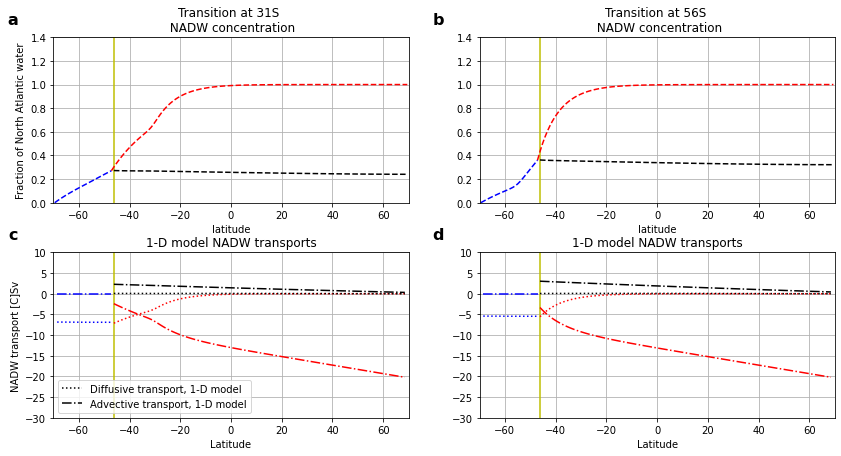

In [21]:
#for vert
plt.figure(figsize=(14,7))
bm=32
plt.subplot(2,2,1)
ax=plt.gca()
ax.axvline(ds50.YC[chanloc],c='y')
modelh=(4000-1000*(np.tanh((np.arange(0,144)-14)/5)+1)/2-100)
plt.grid(True)

a5=plt.plot(ds50.YC[chanloc:],Cpacn[chanloc:,-1]/modelh[-1],'k--')
a4=plt.plot(ds50.YC[:24],Cn[:24,-1]/modelh[:24],'b--')
a4=plt.plot(ds50.YC[23:],Cn[23:,-1]/modelh[23:],'r--')
#plt.legend(('Pacific', 'channel','Atlantic'),loc='best')
plt.ylabel('Fraction of North Atlantic water')
plt.xlabel('latitude')
plt.ylim(0,1.4)
plt.xlim(-70,70)
#faux1=plt.plot([-100, -99],[0,10],'k-',label='tracer concentration, 3-D model')
#faux2=plt.plot([-100, -99],[0,10],'k--',label='tracer concentration, 1-D model')
#plt.legend(handles=[faux1[0],faux2[0]], loc='best')

plt.title('Transition at 31S \n NADW concentration')
ax=plt.gca()
ax.text(-0.1, 1.15, 'a', transform=ax.transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')

plt.subplot(2,2,2)
ax=plt.gca()
ax.axvline(ds50.YC[chanloc],c='y')
modelh=(4000-1000*(np.tanh((np.arange(0,144)-14)/5)+1)/2-100)
plt.grid(True)

a5=plt.plot(ds50.YC[chanloc:],Cpacf[chanloc:,-1]/modelh[-1],'k--')
a4=plt.plot(ds50.YC[:24],Cf[:24,-1]/modelh[:24],'b--')
a4=plt.plot(ds50.YC[23:],Cf[23:,-1]/modelh[23:],'r--')
#plt.legend(('Pacific', 'channel','Atlantic'),loc='best')
#plt.ylabel('Fraction of North Atlantic water')
plt.xlabel('latitude')
plt.ylim(0,1.4)
plt.xlim(-70,70)
plt.title('Transition at 56S \n NADW concentration')
ax=plt.gca()
ax.text(-0.1, 1.15, 'b', transform=ax.transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')

plt.subplot(2,2,3)
ax=plt.gca()
ax.axvline(ds50.YC[chanloc],c='y')
modelh=(4000-1000*(np.tanh((np.arange(0,144)-14)/5)+1)/2-100)
plt.plot(ds50.YC[chanloc:-1],iso_diff_atln[chanloc-1:]/10**6,'r:')
plt.plot(ds50.YC[chanloc:-1],mer_adv_atln[chanloc-1:]/10**6,'r-.')
plt.plot(ds50.YC[1:chanloc],iso_diff_atln[0:chanloc-1]/10**6,'b:')
plt.plot(ds50.YC[1:chanloc],mer_adv_atln[0:chanloc-1]/10**6,'b-.')
plt.plot(ds50.YC[chanloc:-1],iso_diff_pacn[chanloc-1:]/10**6,'k:')
plt.plot(ds50.YC[chanloc:-1],mer_adv_pacn[chanloc-1:]/10**6,'k-.')
plt.ylim(-30,10)
plt.xlim(-70,70)
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('NADW transport [C]Sv')
#plt.legend(('Diffusion, Atl', 'Advection, Atl','Diffusion, Chan', 'Advection, Chan','Diffusion, Pac',
#            'Advection, Pac'),loc='lower left')
faux3=plt.plot([-100, -99],[0,10],'k:',label='Diffusive transport, 1-D model')
faux4=plt.plot([-100, -99],[0,10],'k-.',label='Advective transport, 1-D model')
plt.legend(handles=[faux3[0],faux4[0]], loc='lower left')
plt.title('1-D model NADW transports')
ax=plt.gca()
ax.text(-0.1, 1.15, 'c', transform=ax.transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')


plt.subplot(2,2,4)
ax=plt.gca()
ax.axvline(ds50.YC[chanloc],c='y')
modelh=(4000-1000*(np.tanh((np.arange(0,144)-14)/5)+1)/2-100)
plt.plot(ds50.YC[chanloc:-1],iso_diff_atlf[chanloc-1:]/10**6,'r:')
plt.plot(ds50.YC[chanloc:-1],mer_adv_atlf[chanloc-1:]/10**6,'r-.')
plt.plot(ds50.YC[1:chanloc],iso_diff_atlf[0:chanloc-1]/10**6,'b:')
plt.plot(ds50.YC[1:chanloc],mer_adv_atlf[0:chanloc-1]/10**6,'b-.')
plt.plot(ds50.YC[chanloc:-1],iso_diff_pacf[chanloc-1:]/10**6,'k:')
plt.plot(ds50.YC[chanloc:-1],mer_adv_pacf[chanloc-1:]/10**6,'k-.')
plt.ylim(-30,10)
plt.xlim(-70,70)
plt.grid(True)
plt.xlabel('Latitude')
#plt.ylabel('Transport [C]Sv')
#plt.legend(('Diffusion, Atl', 'Advection, Atl','Diffusion, Chan', 'Advection, Chan','Diffusion, Pac',
#            'Advection, Pac'),loc='lower left')
plt.title('1-D model NADW transports')
ax=plt.gca()
ax.text(-0.1, 1.15, 'd', transform=ax.transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')

plt.subplots_adjust(wspace=0.2,hspace=0.3)
fig = plt.gcf()
fig.savefig('vert_1D.pdf', bbox_inches='tight')


/home/spencerj/.conda/envs/pangeo1/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


/home/spencerj/.conda/envs/pangeo1/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/spencerj/.conda/envs/pangeo1/lib/python3.7/site-packages/ipykernel/__main__.py:15: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f98802d0450> has a label of '_line1' which cannot be automatically added to the legend.
/home/spencerj/.conda/envs/pangeo1/lib/python3.7/site-packages/ipykernel/__main__.py:15: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f99042e6610> has a label of '_line2' which cannot be automatically added to the legend.
/home/spencerj/.conda/envs/pangeo1/lib/python3.7/site-packages/ipykernel/__main__.py:15: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f988022cd90> has a label of '_line3' which cannot be automatically added to the legend.


/home/spencerj/.conda/envs/pangeo1/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


/home/spencerj/.conda/envs/pangeo1/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


/home/spencerj/.conda/envs/pangeo1/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


/home/spencerj/.conda/envs/pangeo1/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


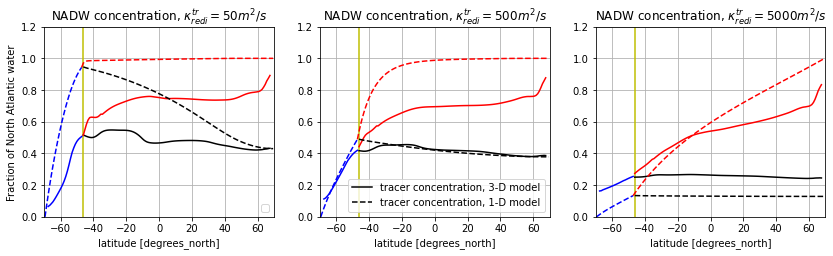

In [22]:
#for LGM
plt.figure(figsize=(14,3.5))
plt.subplot(1,3,1)
ax=plt.gca()
ax.axvline(ds50.YC[chanloc],c='y')
bm=60
a1=((((tracer_LGM50[24:-2,0:140,0:bm].sum('Tlev')/zeta_LGM50[24:-2,0:140,0:bm].sum('Tlev'))*ds50.rA[24:,0:140]).sum('XC'))/(ds50.rA[24:,0:140].sum('XC'))).plot(color='k')
a2=((((tracer_LGM50[2:24,:,0:bm].sum('Tlev')/zeta_LGM50[2:24,:,0:bm].sum('Tlev'))*ds50.rA[2:24,:]).sum('XC'))/(ds50.rA[2:24,:].sum('XC'))).plot(color='b')
a3=((((tracer_LGM50[24:-2,140:,0:bm].sum('Tlev')/zeta_LGM50[24:-2,140:,0:bm].sum('Tlev'))*ds50.rA[24:-2,140:]).sum('XC'))/(ds50.rA[24:-2,140:].sum('XC'))).plot(color='r')
plt.grid(True)
modelh=(4000-800*(np.tanh((np.arange(0,144)-14)/5)+1)/2-100)
a5=plt.plot(ds50.YC[chanloc:],CpacLGM50[chanloc:,-1]/modelh[-1],'k--')
a4=plt.plot(ds50.YC[:24],CLGM50[:24,-1]/modelh[:24],'b--')
a4=plt.plot(ds50.YC[23:],CLGM50[23:,-1]/modelh[23:],'r--')
plt.legend(handles=[a1[0],a2[0],a3[0]],loc='lower right')
plt.ylabel('Fraction of North Atlantic water')
plt.ylim(0,1.2)
plt.xlim(-70,70)
plt.title('NADW concentration, $\kappa_{redi}^{tr}=50m^2/s$')

plt.subplot(1,3,2)
ax=plt.gca()
ax.axvline(ds50.YC[chanloc],c='y')
bm=60
a1=((((tracer_LGM500[24:-2,0:140,0:bm].sum('Tlev')/zeta_LGM500[24:-2,0:140,0:bm].sum('Tlev'))*ds50.rA[24:,0:140]).sum('XC'))/(ds50.rA[24:,0:140].sum('XC'))).plot(color='k')
a2=((((tracer_LGM500[2:24,:,0:bm].sum('Tlev')/zeta_LGM500[2:24,:,0:bm].sum('Tlev'))*ds50.rA[2:24,:]).sum('XC'))/(ds50.rA[2:24,:].sum('XC'))).plot(color='b')
a3=((((tracer_LGM500[24:-2,140:,0:bm].sum('Tlev')/zeta_LGM500[24:-2,140:,0:bm].sum('Tlev'))*ds50.rA[24:-2,140:]).sum('XC'))/(ds50.rA[24:-2,140:].sum('XC'))).plot(color='r')
plt.grid(True)
a5=plt.plot(ds50.YC[chanloc:],CpacLGM500[chanloc:,-1]/modelh[-1],'k--')
a4=plt.plot(ds50.YC[:24],CLGM500[:24,-1]/modelh[:24],'b--')
a4=plt.plot(ds50.YC[23:],CLGM500[23:,-1]/modelh[23:],'r--')
faux1=plt.plot([-100, -99],[0,10],'k-',label='tracer concentration, 3-D model')
faux2=plt.plot([-100, -99],[0,10],'k--',label='tracer concentration, 1-D model')
plt.legend(handles=[faux1[0],faux2[0]], loc='lower right')
#plt.ylabel('C')
plt.ylim(0,1.2)
plt.xlim(-70,70)
plt.title('NADW concentration, $\kappa_{redi}^{tr}=500m^2/s$')

plt.subplot(1,3,3)
ax=plt.gca()
ax.axvline(ds50.YC[chanloc],c='y')
a1=((((tracer_LGM5000[24:-2,0:140,0:bm].sum('Tlev')/zeta_LGM5000[24:-2,0:140,0:bm].sum('Tlev'))*ds50.rA[24:,0:140]).sum('XC'))/(ds50.rA[24:,0:140].sum('XC'))).plot(color='k')
a2=((((tracer_LGM5000[2:24,:,0:bm].sum('Tlev')/zeta_LGM5000[2:24,:,0:bm].sum('Tlev'))*ds50.rA[2:24,:]).sum('XC'))/(ds50.rA[2:24,:].sum('XC'))).plot(color='b')
a3=((((tracer_LGM5000[24:-2,140:,0:bm].sum('Tlev')/zeta_LGM5000[24:-2,140:,0:bm].sum('Tlev'))*ds50.rA[24:-2,140:]).sum('XC'))/(ds50.rA[24:-2,140:].sum('XC'))).plot(color='r')
plt.grid(True)
a5=plt.plot(ds50.YC[chanloc:],CpacLGM5000[chanloc:,-1]/modelh[-1],'k--')
a4=plt.plot(ds50.YC[:24],CLGM5000[:24,-1]/modelh[:24],'b--')
a4=plt.plot(ds50.YC[23:],CLGM5000[23:,-1]/modelh[23:],'r--')
#plt.legend(('Pacific', 'channel','Atlantic'),loc='upper right')
#plt.ylabel('C')
plt.ylim(0,1.2)
plt.xlim(-70,70)
plt.title('NADW concentration, $\kappa_{redi}^{tr}=5000m^2/s$')

fig = plt.gcf()
fig.savefig('LGM_tracer.pdf', bbox_inches='tight')

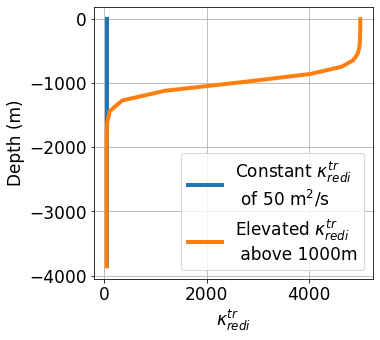

In [16]:
plt.figure(figsize=(5,5))
matplotlib.rcParams.update({'font.size': 17})
kappaiso=np.fromfile('tracers_mod_LGM/mod_1000m/iso_1d_File0.bin',dtype='>f')
kappaiso2000=np.fromfile('tracers_mod_LGM/mod_2000m/iso_1d_File2000.bin',dtype='>f')
plt.plot(50*np.ones(32),ds50.Z.values,linewidth=4)
plt.plot(kappaiso*500,ds50.Z.values,linewidth=4)
plt.legend(('Constant $\kappa_{redi}^{tr}$ \n of 50 m$^2$/s','Elevated $\kappa_{redi}^{tr}$ \n above 1000m'))
plt.grid(True)
plt.xlabel('$\kappa_{redi}^{tr}$')
plt.ylabel('Depth (m)')
fig=plt.gcf()
fig.savefig('above_1000m.pdf', bbox_inches='tight')

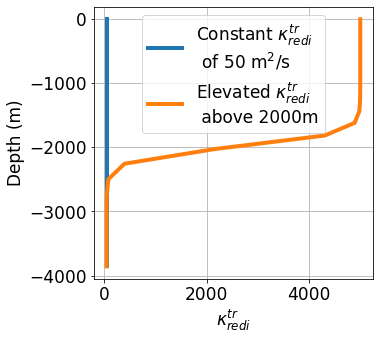

In [16]:
plt.figure(figsize=(5,5))
matplotlib.rcParams.update({'font.size': 17})
kappaiso=np.fromfile('tracers_mod_LGM/mod_1000m/iso_1d_File0.bin',dtype='>f')
kappaiso2000=np.fromfile('tracers_mod_LGM/mod_1000m/iso_1d_File0.bin',dtype='>f')
plt.plot(50*np.ones(32),ds50.Z.values,linewidth=4)
plt.plot(kappaiso2000*500,ds50.Z.values,linewidth=4)
plt.legend(('Constant $\kappa_{redi}^{tr}$ \n of 50 m$^2$/s','Elevated $\kappa_{redi}^{tr}$ \n above 2000m'))
plt.grid(True)
plt.xlabel('$\kappa_{redi}^{tr}$')
plt.ylabel('Depth (m)')
fig=plt.gcf()
fig.savefig('above_2000m.pdf', bbox_inches='tight')

In [25]:
np.diff(vatl)/ds50.dyG[10,10].values

array([  0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        , -77.71535926,
        -0.92518285,  -0.92518285,  -0.92518285,  -0.92518285,
        -0.92518285,  -0.92518285,  -0.92518285,  -0.92518285,
        -0.92518285,  -0.92518285,  -0.92518285,  -0.92518285,
        -0.92518285,  -0.92518285,  -0.92518285,  -0.92518285,
        -0.92518285,  -0.92518285,  -0.92518285,  -0.92518285,
        -0.92518285,  -0.92518285,  -0.92518285,  -0.92518285,
        -0.92518285,  -0.92518285,  -0.92518285,  -0.92518285,
        -0.92518285,  -0.92518285,  -0.92518285,  -0.92518285,
        -0.92518285,  -0.92518285,  -0.92518285,  -0.92518285,
        -0.92518285,  -0.92518285,  -0.92518285,  -0.92

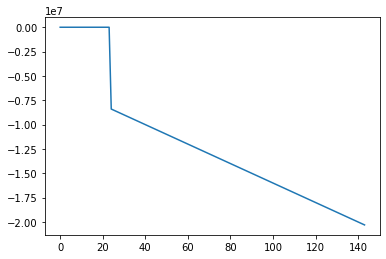

In [26]:
plt.plot(vatl)